In [1]:
import math
import matplotlib.pyplot as plot
import pandas as pd
import numpy as np
from scipy import stats

# Question 2

In [2]:
sampleMeansUniform = []
sampleMeansBinomial = []


# repeat 1,000 times -> create 1,000 replicates
for x in range(1000):
    # create sample arrays for uniform and binomial variables
    sampleUniform = stats.uniform.rvs(loc = 3, scale = 7, size = 100)
    sampleBinomial = stats.binom.rvs(n = 10, p = 0.4, size = 100)
    # get the means of the the sample arrays
    uniformMean = np.mean(sampleUniform)
    binomialMean = np.mean(sampleBinomial)
    # append means to overall arrays
    sampleMeansUniform.append(uniformMean)
    sampleMeansBinomial.append(binomialMean)

### Histograms

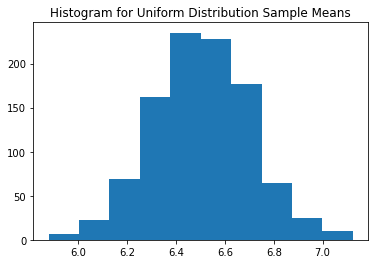

In [3]:
# uniform distribution sample means
plot.hist(sampleMeansUniform)
plot.title('Histogram for Uniform Distribution Sample Means')
plot.show()

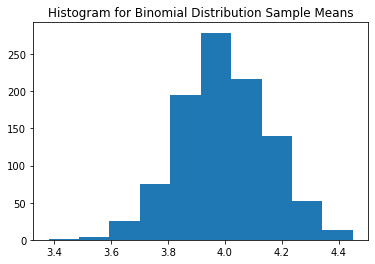

In [4]:
# binomial distribution sample means
plot.hist(sampleMeansBinomial)
plot.title('Histogram for Binomial Distribution Sample Means')
plot.show()

### Distribution Parameters

In [5]:
# get mean and standad deviation of each sample mean array
uniformMean = np.mean(sampleMeansUniform)
uniformSd = np.std(sampleMeansUniform)
binomialMean = np.mean(sampleMeansBinomial)
binomialSd = np.std(sampleMeansBinomial)


print('Uniform Distribution\nSample Mean: {0}\nSample Standard Deviation: {1}\n\nBinomial Distribution\nSample Mean: {2}\nSample Standard Deviation: {3}'.format(uniformMean, uniformSd, binomialMean, binomialSd))

Uniform Distribution
Sample Mean: 6.503802517430876
Sample Standard Deviation: 0.199796347811997

Binomial Distribution
Sample Mean: 3.99742
Sample Standard Deviation: 0.15464909828382445


### PDFs

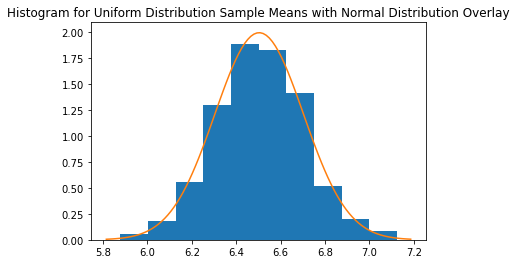

In [6]:
plot.hist(sampleMeansUniform, density = True)
  
# get x value limits
xmin, xmax = plot.xlim()
xVals = np.linspace(xmin, xmax, 100)
yVals = stats.norm.pdf(xVals, uniformMean, uniformSd)
  
plot.plot(xVals, yVals)
plot.title('Histogram for Uniform Distribution Sample Means with Normal Distribution Overlay')
  
plot.show()

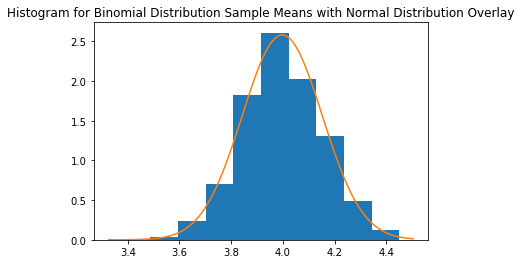

In [7]:
plot.hist(sampleMeansBinomial, density=True)
  
# get x value limits
xmin, xmax = plot.xlim()
xVals = np.linspace(xmin, xmax, 100)
yVals = stats.norm.pdf(xVals, binomialMean, binomialSd)
  
plot.plot(xVals, yVals)
plot.title('Histogram for Binomial Distribution Sample Means with Normal Distribution Overlay')
  
plot.show()

# Question 3

In [8]:
# add names so that first row of data is put into dataframe
cars = pd.read_csv('/Users/mtjen/Desktop/313/data/cars.csv', names = ['col1', 'col2', 'col3', 'col4'])

# only keep first two columns [not including index which is actually US values]
cars = cars.iloc[:,:1]
cars.reset_index(inplace = True)
cars.columns = ['us_mpg', 'japan_mpg']
cars

,us_mpg,japan_mpg
0,18.000000,24.0
1,15.000000,27.0
2,18.000000,27.0
3,16.000000,25.0
4,17.000000,31.0
...,...,...
245,27.000000,NaN
246,32.000000,NaN
247,28.000000,NaN
248,31.000000,NaN


### How many cars from eeach

In [9]:
# returns number of non-null values
cars.count()

us_mpg       250
japan_mpg     80
dtype: int64

### What method to use

In [10]:
# you should use a 2 sample t-test where the null hypothesis is that the average/mean mpg
#    from US cars = average/mean mpg from Japanese cars and the alternative hypotheis 
#    should be that average/mean mpg from Japanese cars > average/mean mpg of US cars. 
#    Unfortunately, because the variables don't have the same number of values, we can only 
#    run a two sided test using the scipy package so the alternative hypothesis will be that
#    the average/mean mpg of US cars != average/mean mpg from Japanese cars

### Statistics and their theoretical distribution

In [11]:
# we would get a t-statistic and the distribution would be a t-distribution with 328 
#      degrees of freedom (250 + 80 - 2)

### Statistic values and p-value

In [12]:
# omit nan's because the two columns have different lengths
# !! can't use one sided test because omit not supported for them -> only supports two sided
result = stats.ttest_ind(cars['us_mpg'], cars['japan_mpg'], nan_policy = 'omit')
result

Ttest_indResult(statistic=-12.498319111524188, pvalue=1.3953628191056123e-29)

### Conclusion about belief

In [13]:
# based on the t-statistic and the p-value, we can reject the null hypothesis so it can  
#      be reasonably assumed that Japanese cars do get better MPG than US cars. This can be  
#      seen by the t-statistic with a magnitude of 12.50, which is much greater than the  
#      2-tailed t-value with alpha = 0.05 and 328 degrees of freedom, which is between 
#      1.962 and 1.984. This means that we can reject the null hypothesis that the mean MPG 
#      of both are more or less the same and we can conclude that there is a statistical
#      difference. Furthermore, because the t-statistic is negative and the US column was
#      listed before the Japan column, we can conclude that Japanese cars statistically
#      do get better MPG than US cars.
#
# !! note: the t-statistic is negative because the US variable was listed first -> if the 
#               order was flipped, the t-statistic would be the same magnitude but positive
#               --> shown below

In [14]:
result = stats.ttest_ind(cars['japan_mpg'], cars['us_mpg'], nan_policy = 'omit')
result

Ttest_indResult(statistic=12.498319111524188, pvalue=1.3953628191056123e-29)

# Question 4

In [15]:
gears = pd.read_csv('/Users/mtjen/Desktop/313/data/gears.csv', names = ['diameter', 'batch'])
gears

,diameter,batch
0,1.006,1
1,0.996,1
2,0.998,1
3,1.000,1
4,0.992,1
...,...,...
95,0.997,10
96,0.991,10
97,0.998,10
98,1.004,10


In [16]:
# returns number of non-null values
gears.groupby(by = 'batch').count()

,diameter
batch,
1,10
2,10
3,10
4,10
5,10
6,10
7,10
8,10
9,10


### What method to use

In [17]:
# you should use an F-test to compare multiple means of the batches, where the null 
#      hypothesis is that the means of all the groups are the same and the 
#      alternative hypothesis is that they aren't all the same

### Statistics and their theoretical distribution

In [18]:
# we would get an f-statistic and the distribution would be an f-distribution where each
#     batch has a chi^2 distribution with 9 degrees of freedom (10 - 1)

### Statistic values and p-value

In [19]:
batchNumber = gears['batch'].unique().tolist()

In [20]:
batch_1 = []
batch_2 = []
batch_3 = []
batch_4 = []
batch_5 = []
batch_6 = []
batch_7 = []
batch_8 = []
batch_9 = []
batch_10 = []

count = 1
for index in range(len(gears)):
    batch = gears['batch'][index]
    if batch == 1:
        batch_1.append(gears['diameter'][index])
    elif batch == 2:
        batch_2.append(gears['diameter'][index])
    elif batch == 3:
        batch_3.append(gears['diameter'][index])
    elif batch == 4:
        batch_4.append(gears['diameter'][index])
    elif batch == 5:
        batch_5.append(gears['diameter'][index])
    elif batch == 6:
        batch_6.append(gears['diameter'][index])
    elif batch == 7:
        batch_7.append(gears['diameter'][index])
    elif batch == 8:
        batch_8.append(gears['diameter'][index])
    elif batch == 9:
        batch_9.append(gears['diameter'][index])
    elif batch == 10:
        batch_10.append(gears['diameter'][index])

In [21]:
results = stats.f_oneway(batch_1, batch_2, batch_3, batch_4, batch_5, 
                         batch_6, batch_7, batch_8, batch_9, batch_10)
results

F_onewayResult(statistic=2.296912413358539, pvalue=0.022660819278641355)

### Conclusion

In [22]:
# from the f-statistic and the p-value, we can't conclude that all of the groups values 
#      are not the same. To reject the null hypothesis for groups with 9 degrees of freedom 
#      and an alpha level of 0.05, the f-statistic should be greater than 3.179 and the 
#       p-value should be less than 0.05. As such, the f-statistic (2.297) is less
#      than 3.179, so we can conclude that there isn't a statistical significance
#      between each batch's gear diameters even though the p-value is less than 0.05 and
#      that the means of all the batches are statistically similar.

# Question 5

In [10]:
airport = pd.read_csv('/Users/mtjen/Desktop/313/data/airport_routes.csv')
airport

,Airport,NumberOfRoutes
0,AAE,9
1,AAL,20
2,AAN,2
3,AAQ,3
4,AAR,8
...,...,...
3404,ZUH,60
3405,ZUM,2
3406,ZVK,3
3407,ZYI,15


In [11]:
movie = pd.read_csv('/Users/mtjen/Desktop/313/data/movie_votes.csv')
movie

,Movie,AverageVote
0,The Shawshank Redemption,8.5
1,The Prisoner of Zenda,8.4
2,The Godfather,8.4
3,Fight Club,8.3
4,Schindler's List,8.3
...,...,...
4387,AWOL-72,2.8
4388,Def-Con 4,2.8
4389,Chairman of the Board,2.7
4390,Foodfight!,2.3


### Part a

In [13]:
def get_alpha(values):
    minVal = min(values)
    sumVals = 0
    for value in values:
        equationVal = math.log(value / minVal)
        sumVals += equationVal
        
    alpha = 1 + len(values) * (sumVals ** -1)
    return alpha

In [15]:
airportAlpha = get_alpha(airport['NumberOfRoutes'])
movieAlpha = get_alpha(movie['AverageVote'])

print('airport_routes alpha parameter: {0}'.format(airportAlpha))
print('movie_votes alpha parameter: {0}'.format(movieAlpha))

airport_routes alpha parameter: 1.612091630402377
movie_votes alpha parameter: 1.8505152700921788


### Part b

In [23]:
airportLambda = 1 / airport['NumberOfRoutes'].mean()
movieLambda = 1 / movie['AverageVote'].mean()

print('airport_routes lambda parameter: {0}'.format(airportLambda))
print('movie_votes lambda parameter: {0}'.format(movieLambda))

airport_routes lambda parameter: 0.050390232365635904
movie_votes lambda parameter: 0.16059264242907353


### Part c

In [24]:
airportMin = min(airport['NumberOfRoutes'])
airportMax = max(airport['NumberOfRoutes'])

movieMin = min(movie['AverageVote'])
movieMax = max(movie['AverageVote'])

print('airport_routes - a parameter: {0}, b parameter: {1}'.format(airportMin, airportMax))
print('movie_votes - a parameter: {0}, b parameter: {1}'.format(movieMin, movieMax))

airport_routes - a parameter: 1, b parameter: 915
movie_votes - a parameter: 1.9, b parameter: 8.5


### Part d

In [25]:
airportMean = airport['NumberOfRoutes'].mean()
airportSd = airport['NumberOfRoutes'].std()

movieMean = movie['AverageVote'].mean()
movieSd = movie['AverageVote'].std()

print('airport_routes - mu parameter: {0}, sigma parameter: {1}'.format(airportMean, airportSd))
print('movie_votes - mu parameter: {0}, sigma parameter: {1}'.format(movieMean, movieSd))

airport_routes - mu parameter: 19.845115869756526, sigma parameter: 53.50646658403525
movie_votes - mu parameter: 6.226935336976315, sigma parameter: 0.8932148326883547


### Model comparsion: airport

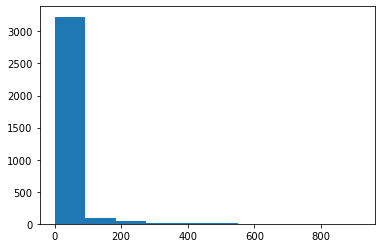

In [9]:
plot.hist(airport['NumberOfRoutes'])
plot.show()

In [118]:
def create_powerlaw(alpha, x_min):
    data = []
    for x in range(x_min, 101):
        valueOne = ((alpha - 1) / x_min)
        valueTwo = ((x / x_min)**(-alpha))
        test = valueOne * valueTwo
        data.append(test)
    return data

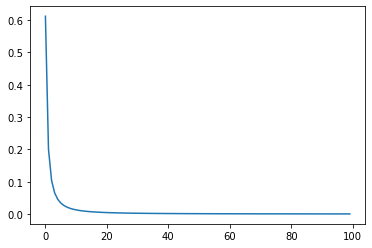

In [119]:
alpha = airportAlpha
powerArray = create_powerlaw(alpha, min(airport['NumberOfRoutes']))
plot.plot(powerArray)
plot.show()

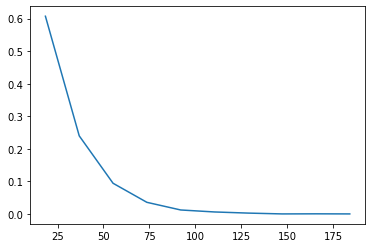

In [12]:
# exponential distribution pdf
lamb = airportLambda
scaleVal = 1 / lamb
exponentialArray = stats.expon.rvs(scale = scaleVal, size = 10000)

count, bins_count = np.histogram(exponentialArray)
pdf = count / sum(count)
plot.plot(bins_count[1:], pdf)

plot.show()

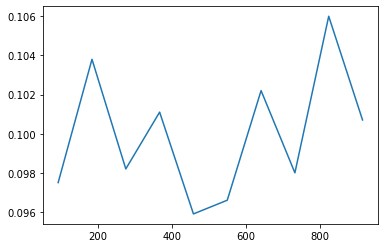

In [13]:
# uniform distribution pdf
uniformArray = stats.uniform.rvs(loc = airportMin, scale = airportMax, size = 10000)

count, bins_count = np.histogram(uniformArray)
pdf = count / sum(count)
plot.plot(bins_count[1:], pdf)

plot.show()

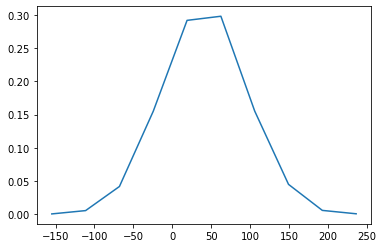

In [14]:
# normal distribution pdf
normalArray = stats.norm.rvs(loc = airportMean, scale = airportSd, size = 10000)

count, bins_count = np.histogram(normalArray)
pdf = count / sum(count)
plot.plot(bins_count[1:], pdf)

plot.show()

In [15]:
# the distribution of the number of routes of each airport appears to follow a power
#      law distribution

### Model comparison: movies

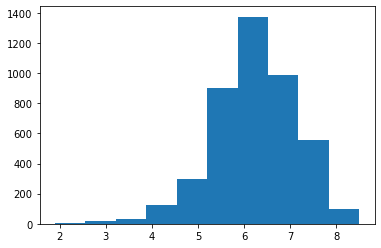

In [16]:
plot.hist(movie['AverageVote'])
plot.show()

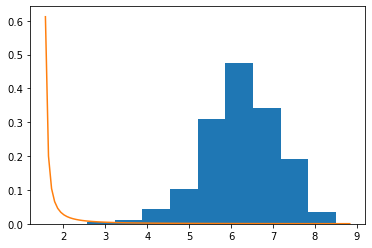

In [17]:
# power law distribution pdf
plot.hist(movie['AverageVote'], density=True)
  
xmin, xmax = plot.xlim()
xVals = np.linspace(xmin, xmax, 100)
alpha = airportAlpha
powerArray = create_powerlaw(alpha, math.floor(min(movie['AverageVote'])))

plot.plot(xVals, powerArray)
plot.show()

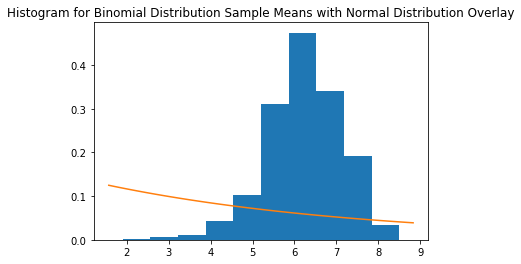

In [18]:
# exponential distribution pdf
plot.hist(movie['AverageVote'], density=True)
  
xmin, xmax = plot.xlim()
xVals = np.linspace(xmin, xmax, 100)
yVals = stats.expon.pdf(xVals, scale = 1/movieLambda)
  
plot.plot(xVals, yVals)
plot.title('Histogram for Binomial Distribution Sample Means with Normal Distribution Overlay')
  
plot.show()

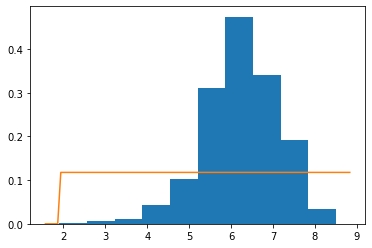

In [19]:
# uniform distribution pdf
plot.hist(movie['AverageVote'], density=True)
  
xmin, xmax = plot.xlim()
xVals = np.linspace(xmin, xmax, 100)
yVals = stats.uniform.pdf(xVals, loc = movieMin, scale = movieMax)
  
plot.plot(xVals, yVals)
  
plot.show()

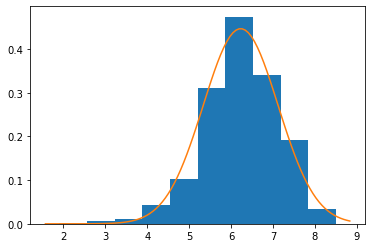

In [20]:
# normal distribution pdf
plot.hist(movie['AverageVote'], density=True)
  
xmin, xmax = plot.xlim()
xVals = np.linspace(xmin, xmax, 100)
yVals = stats.norm.pdf(xVals, movieMean, movieSd)
  
plot.plot(xVals, yVals)
  
plot.show()

In [21]:
# the distribution of the movie votes of movies appears to follow a normal distribution

### Kolmogorov-Smirnov Tests

##### Airport

In [18]:
airportCdf = list(np.cumsum(airport['NumberOfRoutes']))

alpha = airportAlpha
powerArray = stats.powerlaw.rvs(a = airportAlpha, loc = min(airport['NumberOfRoutes']), size = len(airport['NumberOfRoutes']))
powerCdf = list(np.cumsum(powerArray))

stats.kstest(airportCdf, powerCdf)

KstestResult(statistic=0.9310648283954239, pvalue=0.0)

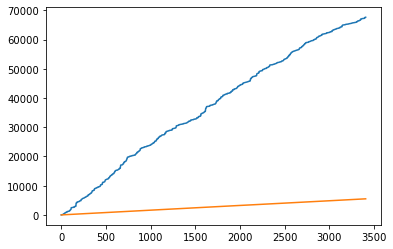

In [21]:
plot.plot(airportCdf)
plot.plot(powerCdf)
  
plot.show()

In [ ]:
# H_0: the airport data follows a power law distribution

# H_1: the airport data doesn't follow a power law distribution

# KS statistic: 0.931

# p-value: 0.000

# no, thought before that the data followed power law distribution but according to 
#      test it doesn't appear to follow it based on the p-value, which indicates that we 
#      should reject the null hypothesis

# possibly because the test wasn't run correctly so the p-value isn't correct as, it 
#      is realistically impossible to have a p-value of 0

In [26]:
lamb = airportLambda
scaleVal = 1 / lamb
exponentialArray = stats.expon.rvs(scale = scaleVal, size = len(airportCdf))
exponCdf = list(np.cumsum(exponentialArray))

stats.kstest(airportCdf, exponCdf)

KstestResult(statistic=0.06805514813728367, pvalue=2.752636253629634e-07)

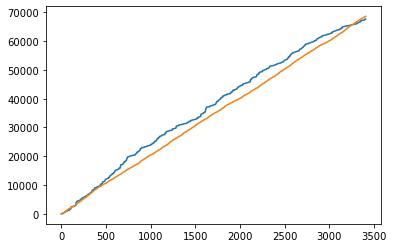

In [27]:
plot.plot(airportCdf)
plot.plot(exponCdf)
  
plot.show()

In [ ]:
# H_0: the airport data follows an exponential distribution

# H_1: the airport data doesn't follow an exponential distribution

# KS statistic: 0.068

# p-value: 2.752e-7

# yes, thought before that the data followed power law distribution and according to 
#      the test it doesn't appear to follow an exponential distribution based on the 
#      p-value, so we should reject the null hypothesis and find that the data doesn't
#      follow an exponential distribution

# because along with the p-value, the KS statistic is also very low, which may indicate
#      that the goodness of fit of an exponential distribution to the data doesn't fit
#      very well

In [28]:
uniformArray = stats.uniform.rvs(loc = airportMin, scale = airportMax, size = len(airportCdf))
uniformCdf = list(np.cumsum(uniformArray))

stats.kstest(airportCdf, uniformCdf)

KstestResult(statistic=0.9562921677911411, pvalue=0.0)

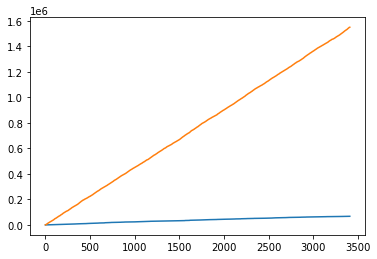

In [29]:
plot.plot(airportCdf)
plot.plot(uniformCdf)
  
plot.show()

In [ ]:
# H_0: the airport data follows a uniform distribution

# H_1: the airport data doesn't follow a uniform distribution

# KS statistic: 0.956

# p-value: 0.000

# yes, thought before that the data followed power law distribution and according to 
#      the test it doesn't appear to follow a uniform distribution based on the 
#      p-value, so we should reject the null hypothesis and find that the data doesn't
#      follow a uniform distribution

# because the p-value is again 0, which is very unlikely to ever happen, so the test may
#      be wrong and as such, the p-value and KS statistic may not be accurate

In [30]:
normalArray = stats.norm.rvs(loc = airportMean, scale = airportSd, size = len(airportCdf))
normalCdf = list(np.cumsum(normalArray))

stats.kstest(airportCdf, normalCdf)

KstestResult(statistic=0.05720152537400997, pvalue=2.850011172130519e-05)

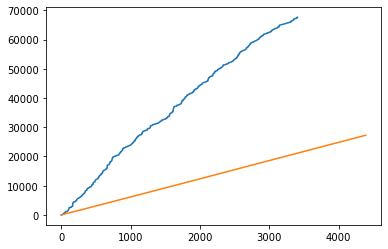

In [127]:
plot.plot(airportCdf)
plot.plot(normalCdf)
  
plot.show()

In [ ]:
# H_0: the airport data follows a normal distribution

# H_1: the airport data doesn't follow a normal distribution

# KS statistic: .057

# p-value: 2.850e-5

# yes, thought before that the data followed power law distribution and according to 
#      the test it doesn't appear to follow a normal distribution based on the 
#      p-value, so we should reject the null hypothesis and find that the data doesn't
#      follow a normal distribution

# because based on the original histogram of the data, a normal distribution is near 
#      impossible to be correct

##### Movie

In [31]:
movieCdf = list(np.cumsum(movie['AverageVote']))

alpha = movieAlpha
powerArray = stats.powerlaw.rvs(a = movieAlpha, loc = min(movie['AverageVote']), size = len(movie['AverageVote']))
powerCdf = list(np.cumsum(powerArray))

stats.kstest(movieCdf, powerCdf)

KstestResult(statistic=0.6418488160291439, pvalue=0.0)

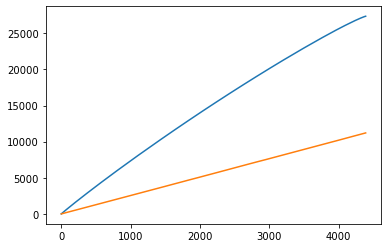

In [32]:
plot.plot(movieCdf)
plot.plot(powerCdf)
  
plot.show()

In [ ]:
# H_0: the movie data follows a power law distribution

# H_1: the movie data doesn't follow a power law distribution

# KS statistic: 0.642

# p-value: 0.000

# yes, thought before that the data followed normal distribution and according to 
#      the test it doesn't appear to follow a power law distribution based on the 
#      p-value, so we should reject the null hypothesis and find that the data doesn't
#      follow a power law distribution

# because the p-value is 0, the test may not have been done accurately so the p-value 
#      KS statistic may not be accurate

In [33]:
lamb = movieLambda
scaleVal = 1 / lamb
exponentialArray = stats.expon.rvs(scale = scaleVal, size = len(movieCdf))
exponCdf = list(np.cumsum(exponentialArray))

stats.kstest(movieCdf, exponCdf)

KstestResult(statistic=0.05714936247723133, pvalue=1.171148402826499e-06)

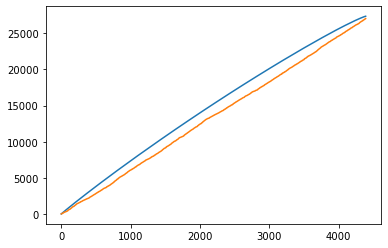

In [54]:
plot.plot(movieCdf)
plot.plot(exponCdf)
  
plot.show()

In [ ]:
# H_0: the movie data follows an exponential distribution

# H_1: the movie data doesn't follow an exponential distribution

# KS statistic: 0.057

# p-value: 1.171e-6

# yes, thought before that the data followed normal distribution and according to 
#      the test it doesn't appear to follow an exponential distribution based on the 
#      p-value, so we should reject the null hypothesis and find that the data doesn't
#      follow an exponential distribution

# because based on the original histogram, it's very unlikely for the data to follow
#      an exponential distibution, which is further proven by the rejected null hypothesis
#      and very low KS statistic, meaning that an exponential distribution doesn't fit
#      the data well

In [34]:
uniformArray = stats.uniform.rvs(loc = movieMin, scale = movieMax, size = len(movieCdf))
uniformCdf = list(np.cumsum(uniformArray))

stats.kstest(movieCdf, uniformCdf)

KstestResult(statistic=0.06238615664845173, pvalue=7.469776610064988e-08)

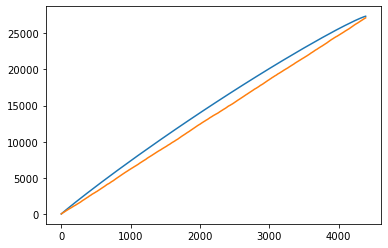

In [37]:
plot.plot(movieCdf)
plot.plot(uniformCdf)
  
plot.show()

In [ ]:
# H_0: the movie data follows a uniform distribution

# H_1: the movie data doesn't follow a uniform distribution

# KS statistic: 0.062

# p-value: 7.470e-8

# yes, thought before that the data followed normal distribution and according to 
#      the test it doesn't appear to follow a uniform distribution based on the 
#      p-value, so we should reject the null hypothesis and find that the data doesn't
#      follow a uniform distribution

# because based on the original histogram, it's very unlikely for the data to follow
#      a uniform distibution, which is further proven by the rejected null hypothesis
#      and very low KS statistic, meaning that an exponential distribution doesn't fit
#      the data well

In [38]:
normalArray = stats.norm.rvs(loc = movieMean, scale = movieSd, size = len(movie))
normalCdf = list(np.cumsum(normalArray))

stats.kstest(movieCdf, normalCdf)

KstestResult(statistic=0.05760473588342441, pvalue=9.307639900401719e-07)

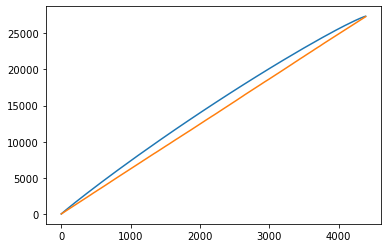

In [39]:
plot.plot(movieCdf)
plot.plot(normalCdf)
  
plot.show()

In [ ]:
# H_0: the movie data follows a normal distribution

# H_1: the movie data doesn't follow a normal distribution

# KS statistic: 0.058

# p-value: 9.308e-7

# no, thought before that the data followed normal distribution and according to 
#      the test it doesn't appear to follow a normal distribution based on the 
#      p-value, so we should reject the null hypothesis and find that the data doesn't
#      follow a normal distribution

# not really sure why on this, as based on the original histogram, the data follows 
#      a normal distribution quite closely. The only thing that I can think of may be that 
#      the KS test function is built for continuous data and the movie data is discrete